In [1]:
from google.cloud import firestore
from tqdm import tqdm
from google.oauth2 import service_account

from datetime import datetime, timedelta

import pandas

credentials = service_account.Credentials.from_service_account_file(
    '/home/r/sabreez-85310b072efc.json')

In [2]:
db = firestore.Client('sabreez', credentials)

In [3]:
# docs = [i for i in tqdm(db.collection('caiso').list_documents())]

In [4]:
# list_docs = []
# for doc in tqdm(docs):
#     doc_dict = doc.get().to_dict()
#     doc_dict = {k.lower(): v for k, v in doc_dict.items()}
#     list_docs.append(doc_dict)

In [5]:
# import pandas
# frame = pandas.DataFrame(list_docs)

In [6]:
# frame['datetime'] = pandas.to_datetime(frame['datetime'])
# frame = frame.set_index('datetime')

# frame

In [7]:
# frame.to_csv('data_{}.csv'.format(datetime.today().date()))
frame = pandas.read_csv('data_2020-03-27.csv'.format((datetime.today()).date()))
frame['datetime'] = pandas.to_datetime(frame['datetime'])
frame = frame.set_index('datetime')
frame

/home/r/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,batteries,large hydro,date,other,solar,nuclear,geothermal,biogas,imports,coal,...,demand,mcc,mce,mcl,mghg,lmp,demand_prediction,demand_prediction_next,solar_forecast,wind_forecast
datetime,,,,,,,,,,,,,,,,,,,,,
2019-03-01 05:00:00+00:00,28.0,3013.0,2019-03-01,0.0,0.0,1132.0,985.0,238.0,3268.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 05:05:00+00:00,79.0,3011.0,2019-03-01,0.0,0.0,1132.0,985.0,239.0,3422.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 05:10:00+00:00,53.0,3010.0,2019-03-01,0.0,0.0,1132.0,986.0,239.0,3415.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 05:15:00+00:00,20.0,2987.0,2019-03-01,0.0,0.0,1132.0,985.0,239.0,3428.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 05:20:00+00:00,9.0,2982.0,2019-03-01,0.0,0.0,1132.0,985.0,239.0,3376.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-03 14:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23493.94,NaN,NaN,NaN
2020-04-03 15:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23069.15,NaN,NaN,NaN
2020-04-03 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22275.27,NaN,NaN,NaN


# Interpolate hourly values

In [8]:
frame = frame.resample(rule=timedelta(minutes=30)).mean()

frame= frame.interpolate(method='time')
frame.to_csv('interpolated.csv')
frame

,batteries,large hydro,other,solar,nuclear,geothermal,biogas,imports,coal,wind,...,thermal,demand,mcc,mce,mcl,mghg,lmp,demand_prediction,solar_forecast,wind_forecast
datetime,,,,,,,,,,,,,,,,,,,,,
2019-03-01 05:00:00+00:00,31.500000,2996.666667,0.0,0.000000,1132.000000,985.166667,238.833333,3369.166667,19.833333,2768.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 05:30:00+00:00,22.000000,2955.333333,0.0,0.000000,1132.000000,985.333333,239.833333,3201.500000,20.166667,2774.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 06:00:00+00:00,-21.500000,2849.500000,0.0,0.000000,1131.833333,985.833333,240.166667,3055.333333,19.333333,2646.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 06:30:00+00:00,19.666667,2854.500000,0.0,0.000000,1131.666667,985.333333,243.333333,2920.000000,19.333333,2530.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 07:00:00+00:00,40.000000,2868.666667,0.0,0.000000,1132.166667,985.000000,244.000000,3010.000000,19.333333,2204.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-03 16:00:00+00:00,-11.833333,1004.666667,0.0,-34.166667,2255.166667,924.666667,215.000000,6430.666667,13.333333,3837.666667,...,1020.0,20537.0,0.480756,-0.01103,-0.001654,0.0,0.468074,22275.270,0.0,3223.58
2020-04-03 16:30:00+00:00,-11.833333,1004.666667,0.0,-34.166667,2255.166667,924.666667,215.000000,6430.666667,13.333333,3837.666667,...,1020.0,20537.0,0.480756,-0.01103,-0.001654,0.0,0.468074,21865.645,0.0,3223.58
2020-04-03 17:00:00+00:00,-11.833333,1004.666667,0.0,-34.166667,2255.166667,924.666667,215.000000,6430.666667,13.333333,3837.666667,...,1020.0,20537.0,0.480756,-0.01103,-0.001654,0.0,0.468074,21456.020,0.0,3223.58


In [9]:
frame = frame.drop(labels=['demand_prediction', 'wind_forecast', 'solar_forecast', 'thermal', 'renewables', 'solar thermal', 'hydro', 'large hydro', 'demand'], axis=1)
frame

,batteries,other,solar,nuclear,geothermal,biogas,imports,coal,wind,small hydro,biomass,natural gas,mcc,mce,mcl,mghg,lmp
datetime,,,,,,,,,,,,,,,,,
2019-03-01 05:00:00+00:00,31.500000,0.0,0.000000,1132.000000,985.166667,238.833333,3369.166667,19.833333,2768.833333,394.166667,282.500000,8827.833333,NaN,NaN,NaN,NaN,NaN
2019-03-01 05:30:00+00:00,22.000000,0.0,0.000000,1132.000000,985.333333,239.833333,3201.500000,20.166667,2774.500000,389.500000,280.500000,8589.666667,NaN,NaN,NaN,NaN,NaN
2019-03-01 06:00:00+00:00,-21.500000,0.0,0.000000,1131.833333,985.833333,240.166667,3055.333333,19.333333,2646.166667,390.500000,281.500000,8684.666667,NaN,NaN,NaN,NaN,NaN
2019-03-01 06:30:00+00:00,19.666667,0.0,0.000000,1131.666667,985.333333,243.333333,2920.000000,19.333333,2530.333333,390.166667,281.500000,8554.000000,NaN,NaN,NaN,NaN,NaN
2019-03-01 07:00:00+00:00,40.000000,0.0,0.000000,1132.166667,985.000000,244.000000,3010.000000,19.333333,2204.000000,389.166667,280.666667,8662.833333,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-03 16:00:00+00:00,-11.833333,0.0,-34.166667,2255.166667,924.666667,215.000000,6430.666667,13.333333,3837.666667,126.000000,315.333333,6248.166667,0.480756,-0.01103,-0.001654,0.0,0.468074
2020-04-03 16:30:00+00:00,-11.833333,0.0,-34.166667,2255.166667,924.666667,215.000000,6430.666667,13.333333,3837.666667,126.000000,315.333333,6248.166667,0.480756,-0.01103,-0.001654,0.0,0.468074
2020-04-03 17:00:00+00:00,-11.833333,0.0,-34.166667,2255.166667,924.666667,215.000000,6430.666667,13.333333,3837.666667,126.000000,315.333333,6248.166667,0.480756,-0.01103,-0.001654,0.0,0.468074


/home/r/.local/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


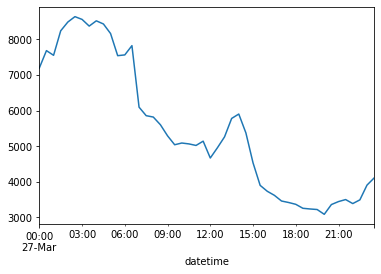

In [10]:
frame.loc['2020-03-27']['natural gas'].plot()

# Multi-step Multivariate Model

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import timedelta

In [12]:
features_considered = ['batteries', 'solar', 'nuclear', 'geothermal',
       'biogas', 'imports', 'coal', 'wind', 'small hydro', 'biomass',
       'natural gas']
features = frame[features_considered]

# features = features.resample(rule=timedelta(minutes=5)).mean()

features = features.interpolate(method='time')
features = features.fillna(method='bfill')

features = features[:datetime.today()]
features = features[(features['solar'] > 0)]

features

,batteries,solar,nuclear,geothermal,biogas,imports,coal,wind,small hydro,biomass,natural gas
datetime,,,,,,,,,,,
2019-03-01 11:30:00+00:00,59.333333,175.833333,1131.833333,986.500000,242.833333,3069.833333,21.166667,1929.333333,543.166667,282.000000,11184.500000
2019-03-01 12:00:00+00:00,-1.000000,686.166667,1131.500000,986.666667,242.333333,3451.500000,21.500000,1879.166667,517.666667,280.666667,11114.333333
2019-03-01 12:30:00+00:00,-0.333333,1628.500000,1131.666667,985.333333,242.333333,3727.833333,20.166667,1632.500000,497.166667,279.000000,10318.333333
2019-03-01 13:00:00+00:00,-26.166667,3428.333333,1132.166667,984.666667,238.166667,2864.666667,19.500000,1591.333333,469.000000,278.666667,9731.333333
2019-03-01 13:30:00+00:00,-5.166667,4553.500000,1132.166667,984.000000,237.500000,2213.666667,20.166667,1570.333333,452.000000,281.666667,9160.000000
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-28 00:00:00+00:00,4.833333,5448.333333,2243.500000,925.666667,216.000000,4054.333333,17.000000,2260.833333,137.333333,355.000000,4582.333333
2020-03-28 00:30:00+00:00,38.000000,4294.833333,2243.000000,925.833333,215.666667,5370.833333,17.833333,2289.666667,143.833333,360.833333,4857.333333
2020-03-28 01:00:00+00:00,4.000000,2886.333333,2242.500000,927.666667,215.666667,6538.000000,17.166667,2362.000000,150.500000,364.833333,5481.166667


In [13]:
dataset = features.values

TRAIN_SPLIT = round(features.shape[0] * 5/6)
print(TRAIN_SPLIT)


data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std

dataset

10372


array([[ 2.5546132 , -1.21171931, -1.30701057, ...,  0.18343698,
        -1.05657484,  0.96152412],
       [ 0.06991005, -1.08666695, -1.30761796, ...,  0.14793009,
        -1.08302566,  0.94450211],
       [ 0.09736534, -0.85575708, -1.30731426, ...,  0.11938534,
        -1.11608919,  0.75139726],
       ...,
       [ 0.27582468, -0.54753692,  0.71683824, ..., -0.36332266,
         0.5866825 , -0.42207047],
       [ 0.22091411, -0.97942088,  0.71805304, ..., -0.35798503,
         0.49079826, -0.20947724],
       [-0.23209806, -1.23132255,  0.72169742, ..., -0.3598416 ,
         0.49741097, -0.07681874]])

In [14]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [15]:
past_history = 2 * 24 * 7
future_target = 2 * 24 * 1

TARGET=10
STEP = 1

x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, TARGET], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, True)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, TARGET],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, True)

In [16]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (336, 11)

 Target temperature to predict : (48,)


In [17]:
BATCH_SIZE = 512
BUFFER_SIZE = 100000

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [18]:
def create_time_steps(length):
  return list(range(-length, 0))

def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, TARGET]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

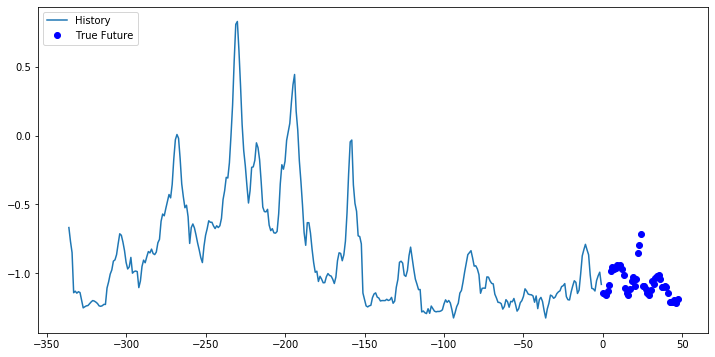

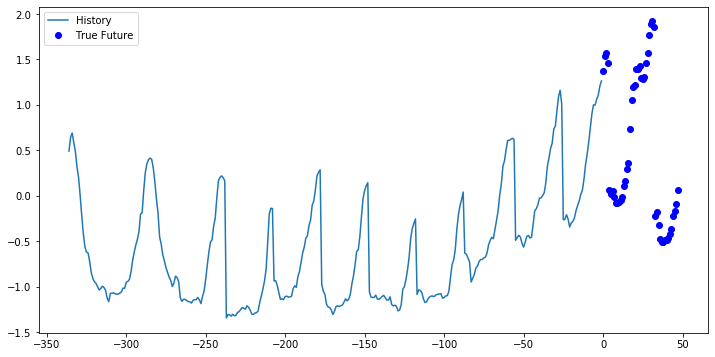

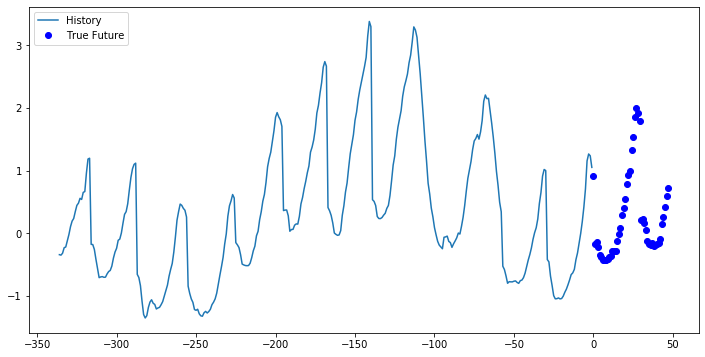

In [19]:
for x, y in train_data_multi.take(3):
  multi_step_plot(x[0], y[0], np.array([0]))

In [24]:
def gen_model(width, depth):

    multi_step_model = tf.keras.models.Sequential()
    multi_step_model.add(tf.compat.v1.keras.layers.CuDNNLSTM(width,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
    
    if depth == 0:
         multi_step_model.add(tf.compat.v1.keras.layers.CuDNNLSTM(width))
        
    else:
        for i in range(depth):
                multi_step_model.add(tf.compat.v1.keras.layers.CuDNNLSTM(width, return_sequences=True))

        multi_step_model.add(tf.compat.v1.keras.layers.CuDNNLSTM(width))
    multi_step_model.add(tf.keras.layers.Dense(future_target))

    multi_step_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse')
    
    return multi_step_model

In [ ]:
# EVALUATION_INTERVAL = len(x_train_multi)
EVALUATION_INTERVAL = 1000
# VALIDATION_INTERVAL = len(x_val_multi)
VALIDATION_INTERVAL=50
EPOCHS = 10

for depth in range(6):
    for width in [2**i for i in range(3, 10)]:
        model = gen_model(width, depth)
        print('Training ' 'w{}, d{}'.format(width, depth))
#         model.summary()

        log_dir = "logs/fit/" + 'w{}d{}-'.format(width, depth) + datetime.now().strftime("%Y%m%d-%H%M%S")
        tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

        multi_step_history = model.fit(train_data_multi, epochs=EPOCHS, verbose=0,
                                                  steps_per_epoch=EVALUATION_INTERVAL,
                                                  validation_data=val_data_multi,
                                                  validation_steps=VALIDATION_INTERVAL,
                                                  callbacks=[tensorboard_callback])

Training w8, d0
Training w16, d0
Training w32, d0
Training w64, d0
Training w128, d0
Training w256, d0


In [ ]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

In [ ]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

In [ ]:
for x, y in val_data_multi.take(5):
    multi_step_plot(x[0]* data_std[TARGET] + data_mean[TARGET], 
                    y[0]* data_std[TARGET] + data_mean[TARGET], 
                    model.predict(x)[0]* data_std[TARGET] + data_mean[TARGET])


# Predict future

In [ ]:
predict_dataset = dataset[-4*past_history:-2*past_history]
print(predict_dataset.shape)

future = dataset[-(2*past_history):-past_history] * data_std[TARGET] + data_mean[TARGET]
print(future.shape)

In [ ]:
predict_dataset = predict_dataset.reshape([1, predict_dataset.shape[0], predict_dataset.shape[1]])

In [ ]:
predict_dataset.shape

In [ ]:
prediction = model.predict(predict_dataset)[0]
prediction = prediction * data_std[TARGET] + data_mean[TARGET]
prediction

In [ ]:
plt.plot(prediction)
plt.plot(future[TARGET])

In [ ]:
multi_step_plot(predict_dataset,)

In [ ]:
pred_frame = pandas.DataFrame(prediction)
pred_frame.to_csv('prediction.csv')

In [ ]:
for x, y in val_data_multi.take(5):
    test_x = np.array(x[0]).reshape([1, x[0].shape[0], x[0].shape[1]])
    prediction = model.predict(test_x)[0]

    multi_step_plot(x[0], y[0], prediction)